In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = 'D:\AIO2024\AIO2024\AIO-Exercise\Module 5\M5-W2-Exercise\creditcard.csv'
df = pd.read_csv(dataset_path)

In [3]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [4]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [5]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1


In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [7]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [8]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]


In [9]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

In [10]:
def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))


In [11]:
def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n

In [12]:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

In [13]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

In [14]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [16]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

        train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
        val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
        train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
        val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

        train_losses.append(train_batch_loss)
        val_losses.append(val_batch_loss)
        train_accs.append(train_batch_acc)
        val_accs.append(val_batch_acc)

        print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.392	Validation loss: 0.393

EPOCH 1:	Training loss: 0.397	Validation loss: 0.392

EPOCH 1:	Training loss: 0.398	Validation loss: 0.391

EPOCH 1:	Training loss: 0.397	Validation loss: 0.391

EPOCH 1:	Training loss: 0.401	Validation loss: 0.390

EPOCH 1:	Training loss: 0.399	Validation loss: 0.390

EPOCH 1:	Training loss: 0.402	Validation loss: 0.389

EPOCH 1:	Training loss: 0.403	Validation loss: 0.388

EPOCH 1:	Training loss: 0.404	Validation loss: 0.388

EPOCH 1:	Training loss: 0.402	Validation loss: 0.387

EPOCH 1:	Training loss: 0.399	Validation loss: 0.387

EPOCH 1:	Training loss: 0.399	Validation loss: 0.386

EPOCH 1:	Training loss: 0.398	Validation loss: 0.385

EPOCH 1:	Training loss: 0.398	Validation loss: 0.385

EPOCH 1:	Training loss: 0.397	Validation loss: 0.384

EPOCH 1:	Training loss: 0.396	Validation loss: 0.384

EPOCH 1:	Training loss: 0.396	Validation loss: 0.383

EPOCH 1:	Training loss: 0.394	Validation loss: 0.382

EPOCH 1:	Training loss: 0.3

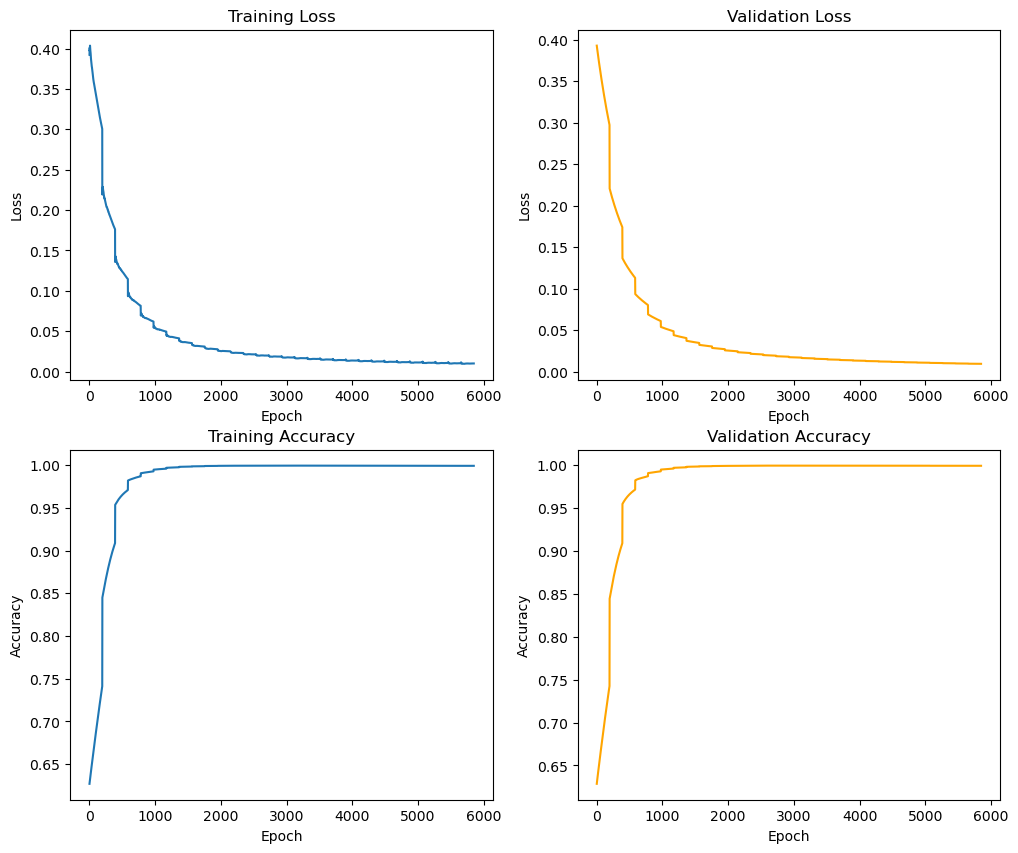

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [18]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.9993153330290369
Accuracy: 0.9992275552122467
